<a href="https://colab.research.google.com/github/Zhipeng98/Statistics-of-Covid19/blob/gh-pages/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics and trend prediction of COVID-19 cases in NYC

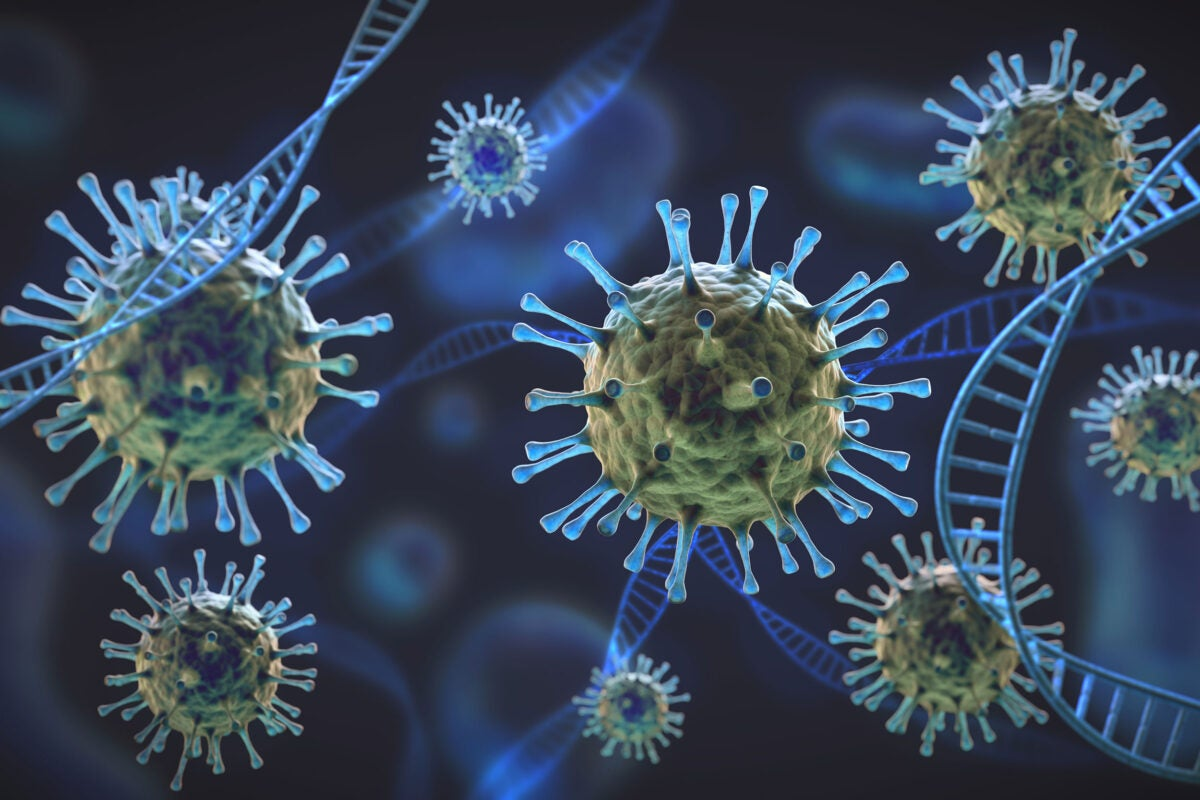




# Theme: 
Covid-19

# Description

In this Project, I will do the statistics and the prediction of COVID-19 cases in NYC. I will show these statistical data and the trend of the cases in future  by graphs, and make them visualization.

# Relevance:

It is important to analyze and predict COVID-19 cases which are related to all of us. According to analysis the number of inflected people, death cases and prediction, it will help us figure out the efficiency of the vaccine, the effectiveness of the control and the trend of COVID-19.    

#Data Sources:

Here is the data source of the COVID-19 data: https://data.cityofnewyork.us/Health/COVID-19-Daily-Counts-of-Cases-Hospitalizations-an/rc75-m7u3/data.

# Data Analysis and Visualization

  The graph shows the trend and number of the infection, the independent variable is the Date, and the dependent variable is Number of infections. According to analyze the data of the infected cases, the maximum number of the infections per day is 6589 people, and the minimum number is  0 case. The average of the number of infections is 1499 people per day. From the graph, it shows that the number of infected is increasing quickly at the beginning of 2020. Between January and  February 2021, the number of infections reached its maximum per day.After February 2021, the infection cases were decreasing because people began to vaccinate.Here is the graph: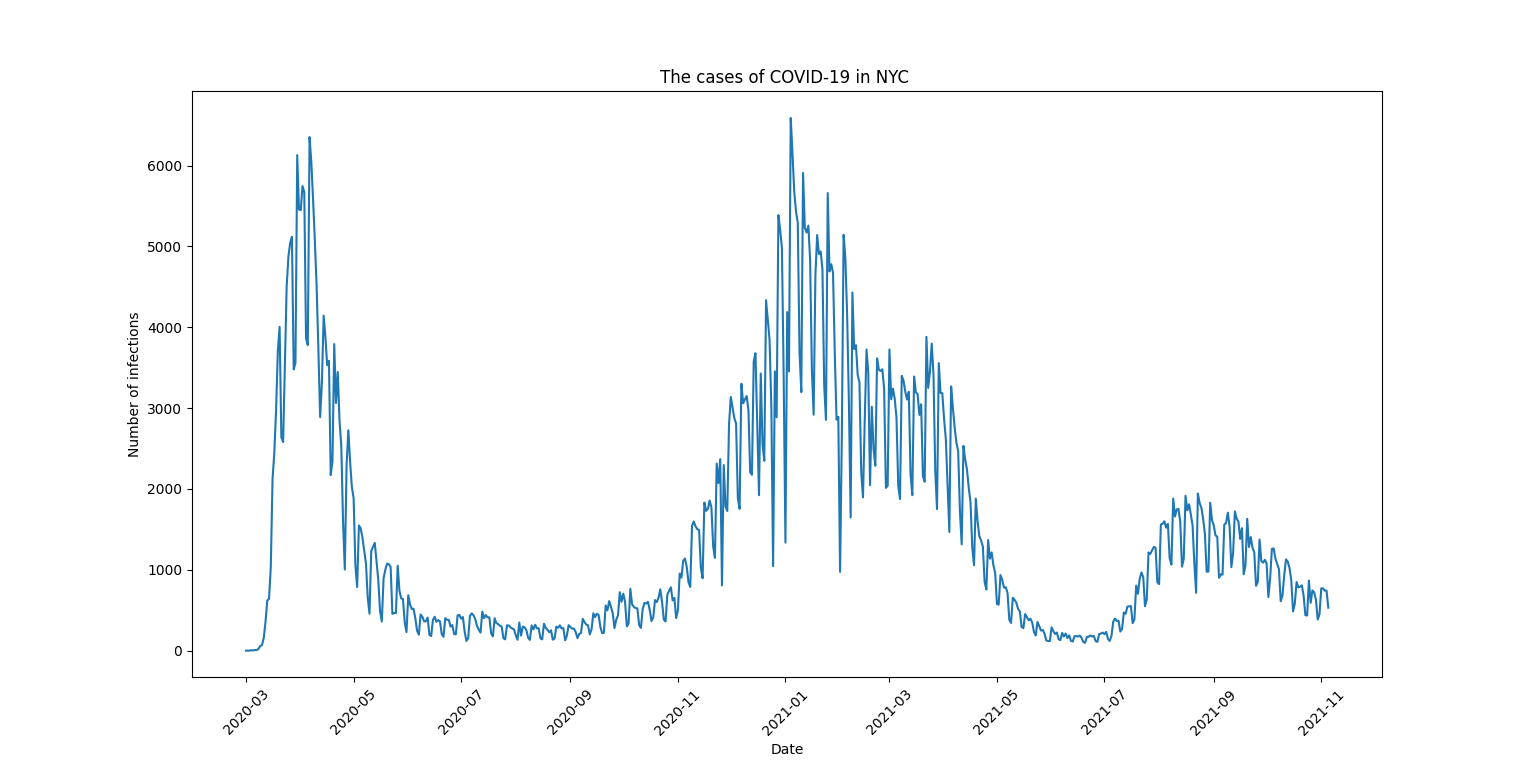

Here is a graph that shows  the trending of 7_day average cases: 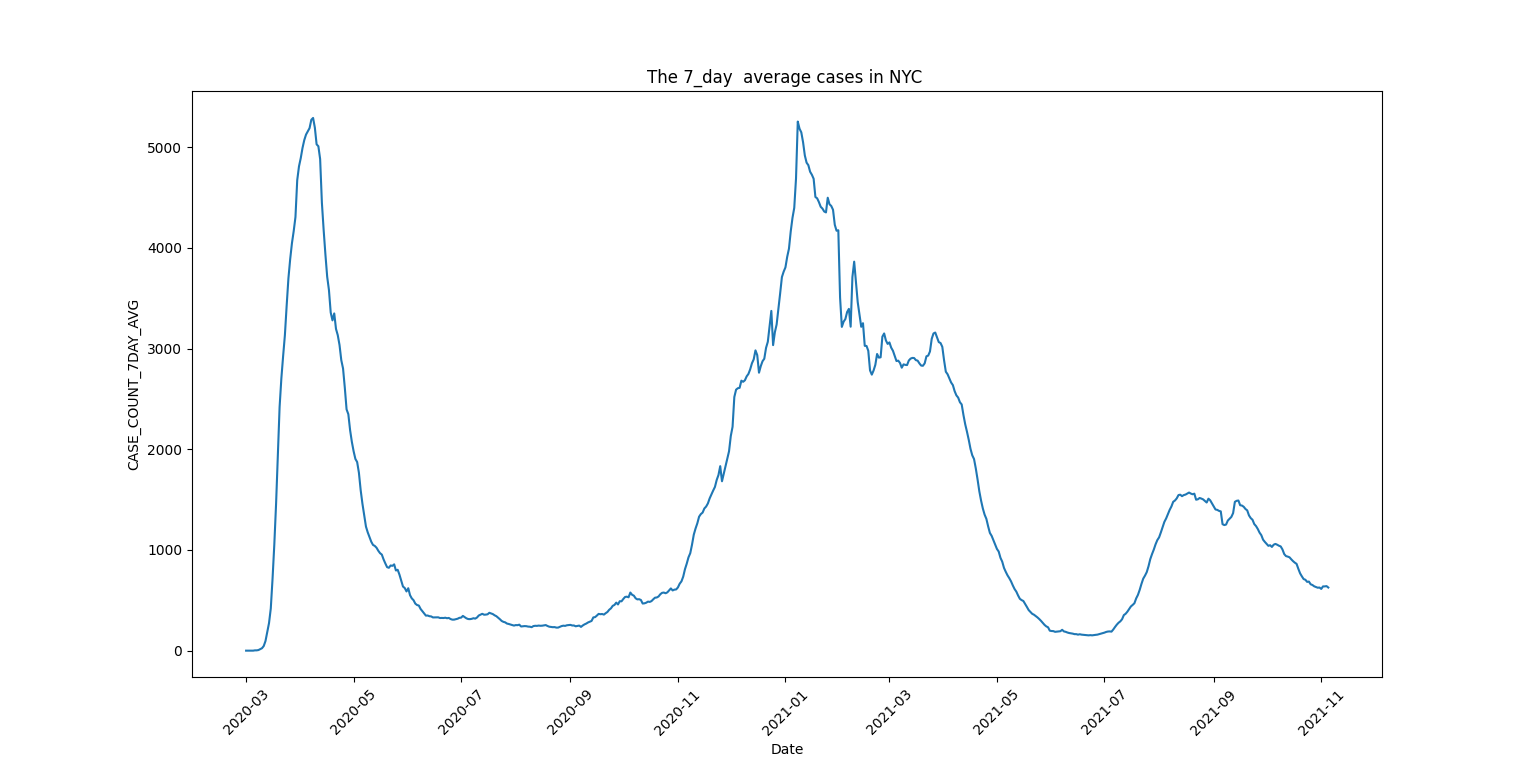

This graph shows the trend of the death cases per day. According to the analysis, the maximum of the death number perday is 598 people in NYC,and the minimum number of death is 0 people per day. The average of the death number per day is 48 people per day. According to the graph , it shows that after April 2020, the death number is decreasing because people were aware the danger of Covid-19, and they wore masks and vaccinated. Here is the graph of death cases trending: 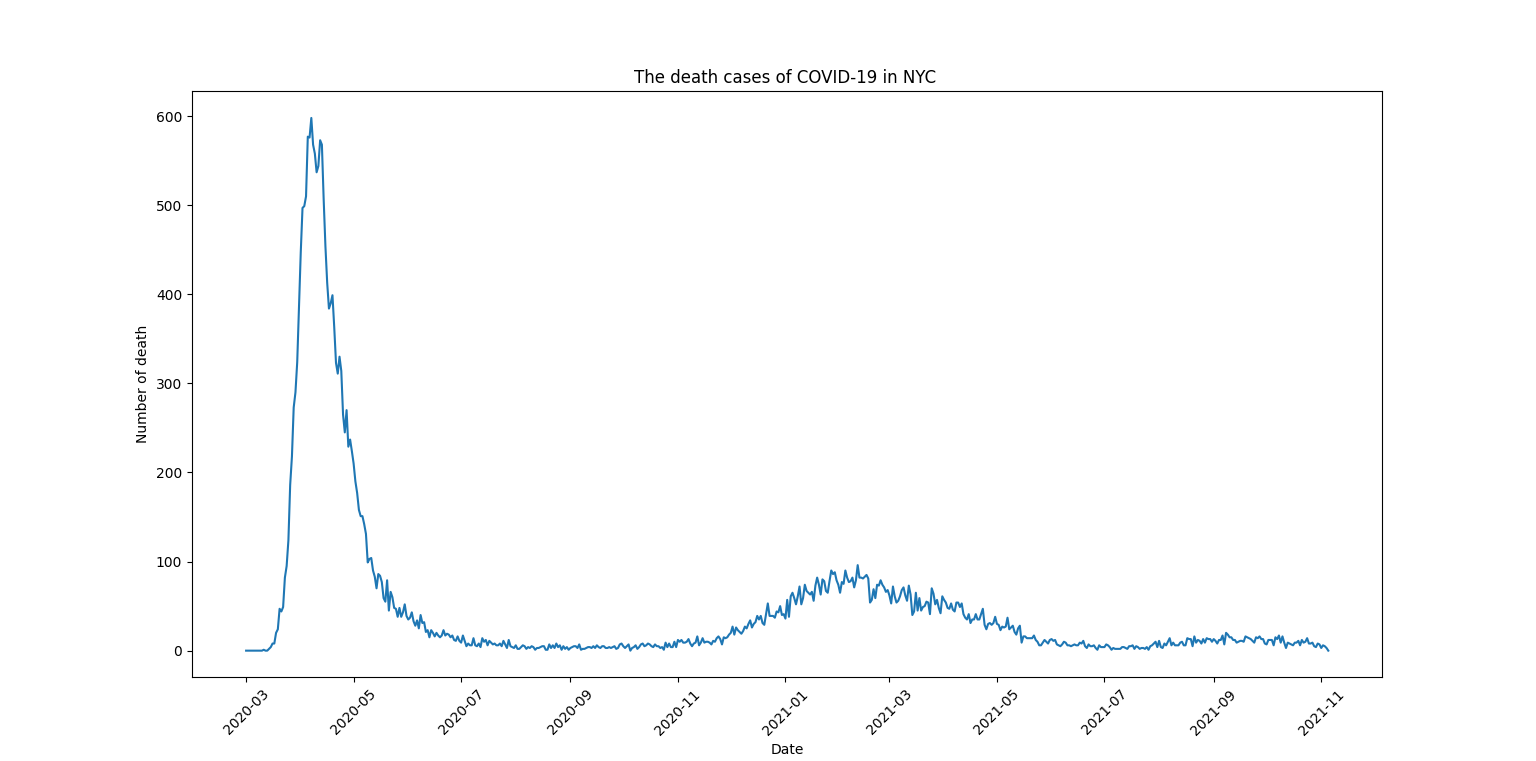

Here is a graph that shows the trending of 7_day average death :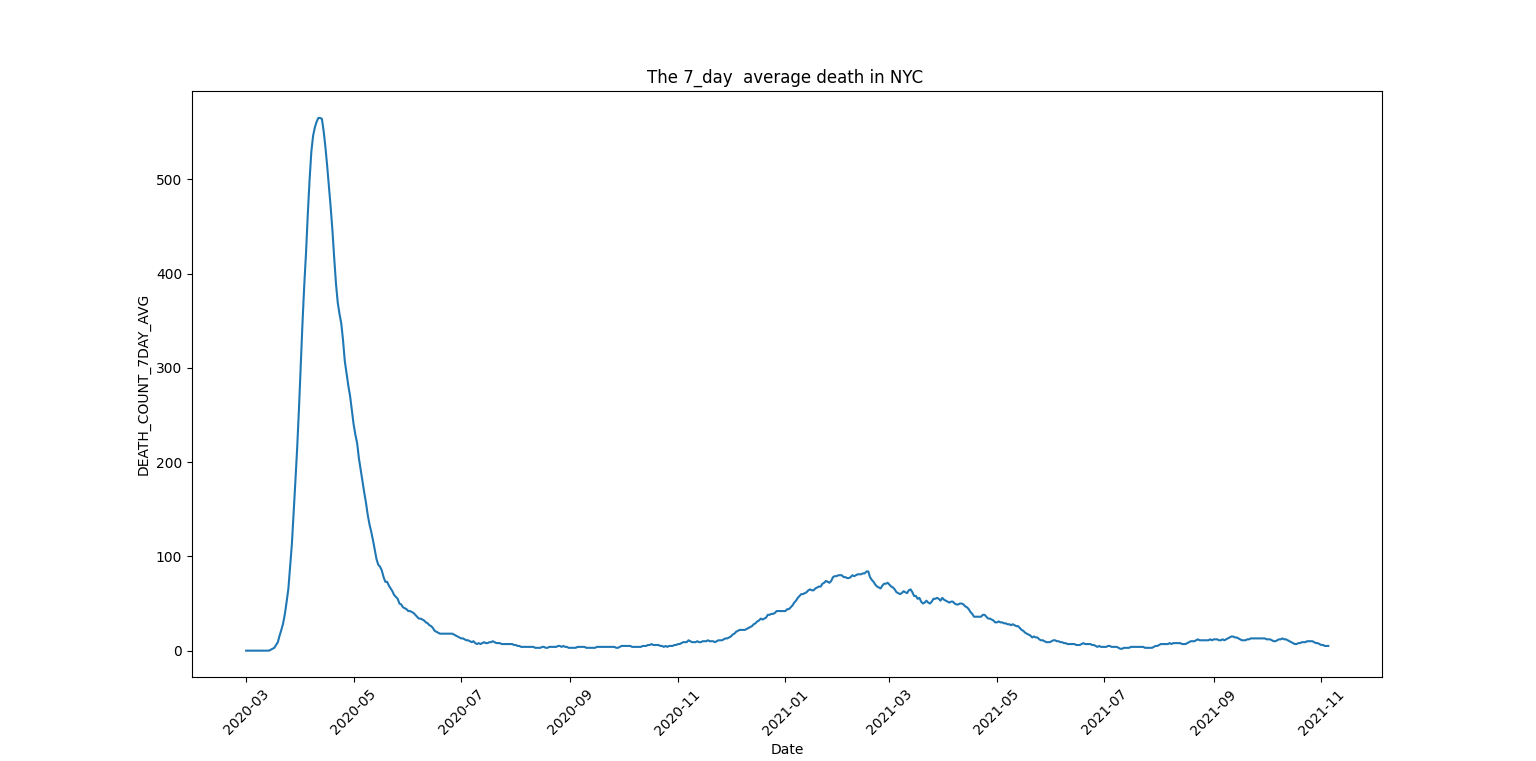

# Prediction:

For the case_count prediction, I use linear regression model to predict the trending of the case count in future. According to the train_test data, the cofficient is -0.857, and the intercept is 633865. The linear function is : y=-0.875x+633865. x is the date which is transformed to the proleptic Gregorian ordinal of the date. According to the predicted data and function, it shows that the case count of infections will decrease in future.Here is the graph: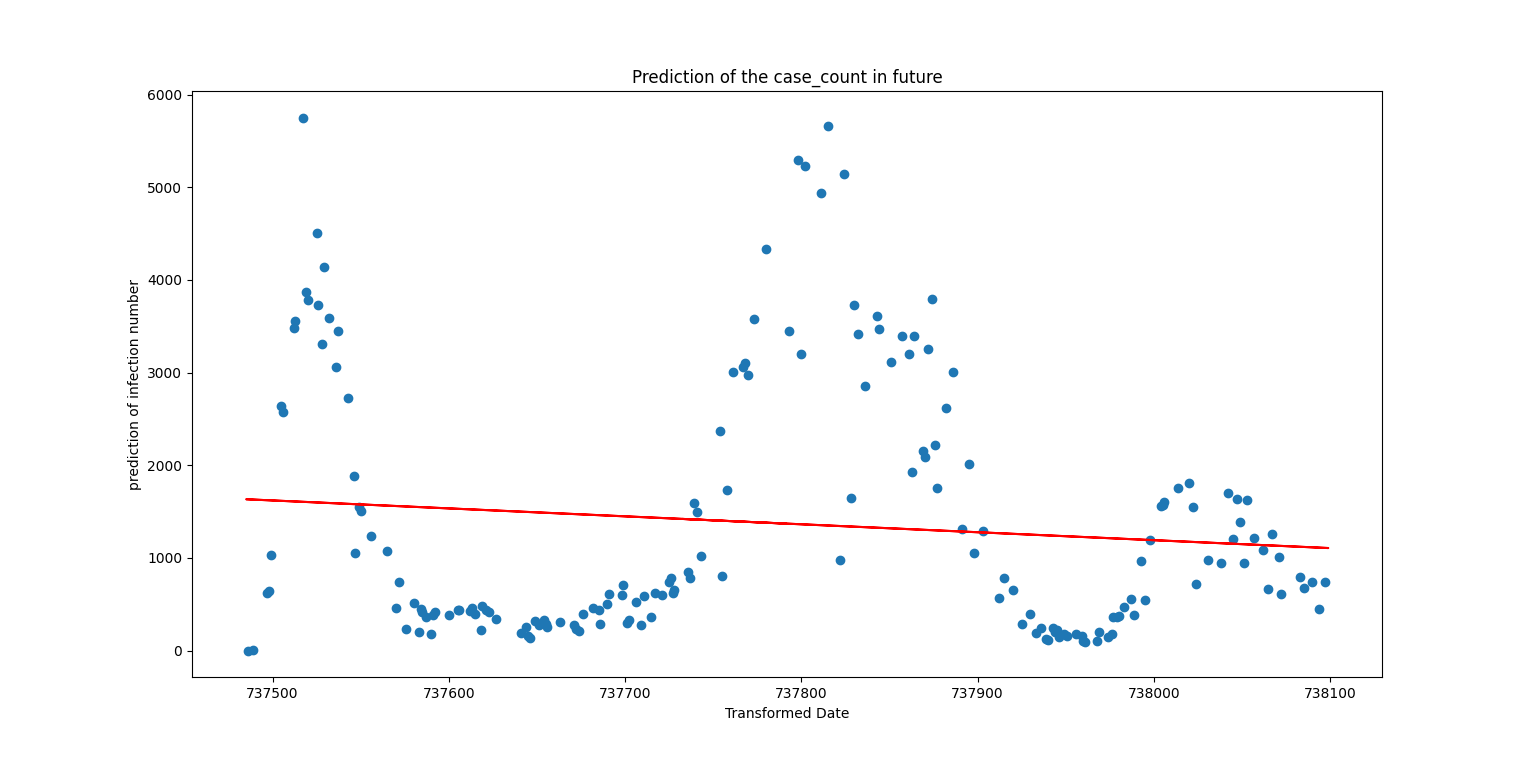

For death_count prediction, I use linear regression mode to predict the death number per day in the future.By the train_test data, the cofficient is -0.264, and the intercept is 194693. The linear function is : y=--0.264x+194693. x is the date which is transformed to the proleptic Gregorian ordinal of the date. According to the graph, it shows that the death counts are decreasing rapidly in future. Here is the graph: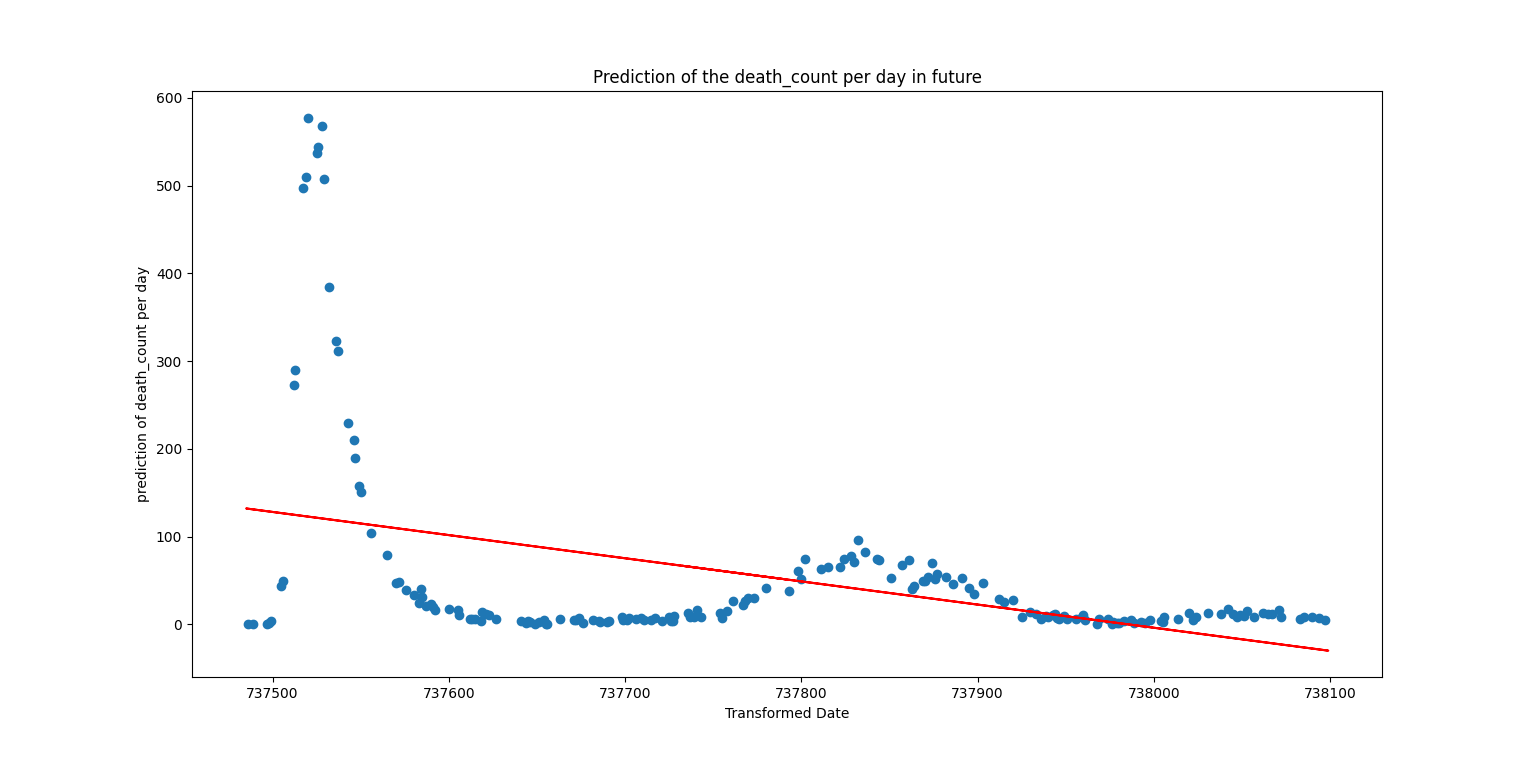